In [17]:
# importing

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt
import os

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [12]:
# Enable GPU if available
device_name = tf.test.gpu_device_name()
print("GPU Device:", device_name if device_name else "No GPU found")

GPU Device: No GPU found


In [14]:
# Paths
train_dir = 'Fruit_classification/train'
test_dir = 'Fruit_classification/test'

# Data generators with augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 220 images belonging to 3 classes.
Found 55 images belonging to 3 classes.


In [15]:
# ---------------- Improved CNN Model ---------------- #
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,163 (6.61 MB)

 Trainable params: 1,732,163 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
checkpoint = callbacks.ModelCheckpoint(
    'best_fruit_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)

early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1
)

In [19]:
# ---------------- Train Model ---------------- #
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.3698 - loss: 1.2208
Epoch 1: val_accuracy improved from None to 0.34545, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.3545 - loss: 1.1868 - val_accuracy: 0.3455 - val_loss: 1.0469
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.4686 - loss: 0.9997
Epoch 2: val_accuracy improved from 0.34545 to 0.69091, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.4545 - loss: 0.9890 - val_accuracy: 0.6909 - val_loss: 0.8234
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7121 - loss: 0.7839
Epoch 3: val_accuracy improved from 0.69091 to 0.89091, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 0.7227 - loss: 0.7370 - val_accuracy: 0.8909 - val_loss: 0.5439
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.7711 - loss: 0.5966
Epoch 4: val_accuracy improved from 0.89091 to 0.90909, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8091 - loss: 0.5300 - val_accuracy: 0.9091 - val_loss: 0.4551
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9108 - loss: 0.3291
Epoch 5: val_accuracy improved from 0.90909 to 0.92727, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step - accuracy: 0.8909 - loss: 0.3703 - val_accuracy: 0.9273 - val_loss: 0.4102
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8477 - loss: 0.5239
Epoch 6: val_accuracy did not improve from 0.92727
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.8500 - loss: 0.4507 - val_accuracy: 0.8909 - val_loss: 0.4475
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8964 - loss: 0.3078
Epoch 7: val_accuracy improved from 0.92727 to 0.96364, saving model to best_fruit_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 482ms/step - accuracy: 0.8955 - loss: 0.3011 - val_accuracy: 0.9636 - val_loss: 0.2548
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9270 - loss: 0.2379
Epoch 8: val_accuracy did not improve from 0.96364
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - accuracy: 0.9455 - loss: 0.1989 - val_accuracy: 0.9455 - val_loss: 0.2364
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9583 - loss: 0.1419
Epoch 9: val_accuracy did not improve from 0.96364
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.9455 - loss: 0.1832 - val_accuracy: 0.9091 - val_loss: 0.4466
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9423 - loss: 0.1478
Epoch 10: val_accuracy did not improve from 0.96364
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 0.9455 - loss: 0.1776 - val_accuracy: 0.9455 - val_loss: 0.2317
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9524 - loss: 0.1123
Epoch 11: val_accuracy did not improve from 0.96

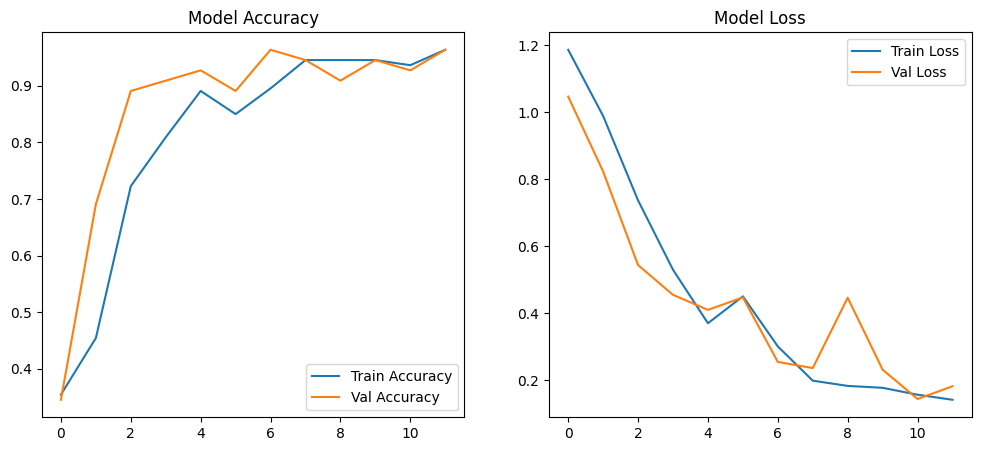

In [21]:
# 📊 6. Plot accuracy/loss
# -----------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [22]:
best_model = tf.keras.models.load_model('best_fruit_model.h5')
loss, acc = best_model.evaluate(test_gen)
print(f"\n✅ Best model accuracy on test data: {acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.9636 - loss: 0.2548

✅ Best model accuracy on test data: 96.36%


In [23]:
best_model.save("final_fruit_classifier.h5")
print("✅ Saved best model as 'best_fruit_model.h5' and 'final_fruit_classifier.h5'")

✅ Saved best model as 'best_fruit_model.h5' and 'final_fruit_classifier.h5'
